In [26]:
import pandas as pd 
import numpy as np 
import os 
import csv

In [3]:
os.chdir(r'C:\Users\Bijan\Desktop\fuzzy_files')

In [22]:
with open('fuzz_log.txt','rb') as f :
    

In [41]:
timestamp=[]
response_time=[]
ip=[]

In [42]:
with open("fuzz_log.txt",'r',encoding="utf8") as f:
    c = csv.reader(f, delimiter=' ', skipinitialspace=True)
    for line in c:
        if 'OK' in line:
            timestamp.append(line[0]+' '+ line[1])
            response_time.append(line[2])
            ip.append(line[3])

In [44]:
df=pd.DataFrame({'timestamp':timestamp,"response_time":response_time,"ip":ip})

In [45]:
df.head()

,ip,response_time,timestamp
0,10.20.15.193,0.11055135726928711,[2018-Feb-08 14:17]
1,10.20.15.193,0.11810517311096191,[2018-Feb-08 14:17]
2,10.20.15.193,0.10148262977600098,[2018-Feb-08 14:17]
3,10.20.15.193,0.09942364692687988,[2018-Feb-08 14:17]
4,10.20.15.193,0.11459016799926758,[2018-Feb-08 14:17]


In [49]:
df['timestamp']=df['timestamp'].map(lambda x: x.lstrip('[').rstrip(']'))

In [61]:
df['timestamp']=pd.to_datetime(df.timestamp)

In [66]:
df['response_time']=df['response_time'].astype('float')

# plotting response time 

In [92]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import bokeh 

In [67]:
df.response_time.mean()

0.13590450247123786

In [68]:
df.response_time.median()

0.12009358406066895

In [69]:
df.response_time.std()

0.06780074159392784

In [80]:
fig=plt.figure()

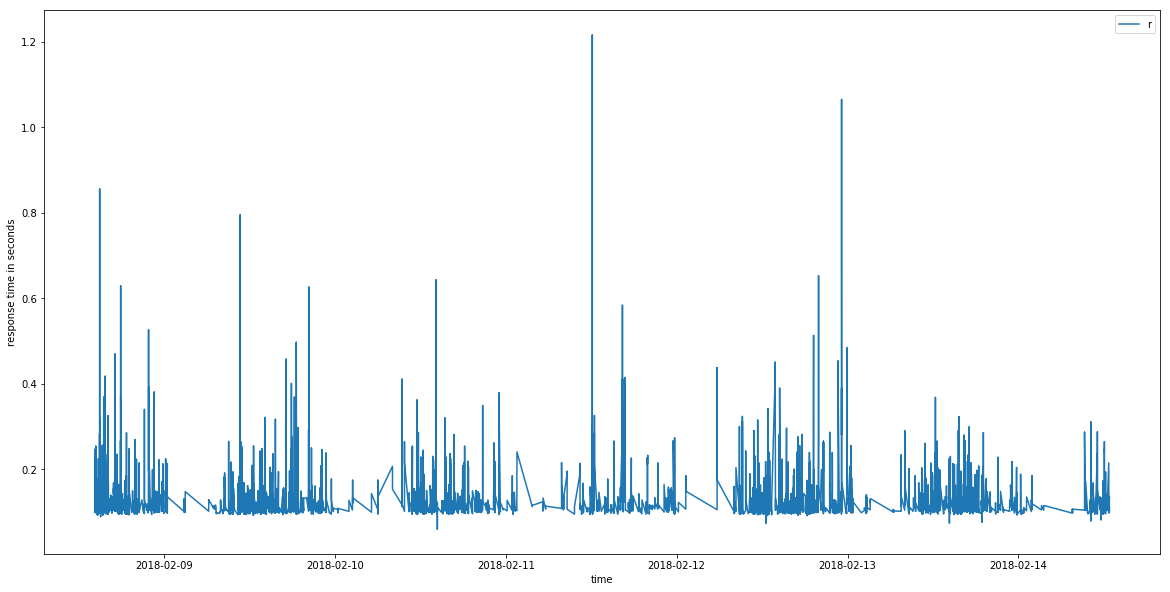

In [82]:
plt.figure(figsize=(20,10))
plt.plot(df.timestamp,df.response_time)
plt.legend('response- time ')
plt.xlabel('time')
plt.ylabel('response time in seconds')
plt.show()

In [87]:
df.sort_values(by='response_time',ascending=False)[0:10]

,ip,response_time,timestamp
4102,10.20.15.193,1.216219,2018-02-11 12:09:00
4104,10.20.16.120,1.181865,2018-02-11 12:09:00
4105,10.20.16.120,1.100674,2018-02-11 12:09:00
4106,10.20.16.120,1.077967,2018-02-11 12:09:00
6027,10.20.15.193,1.065219,2018-02-12 23:10:00
4101,10.20.16.120,1.055851,2018-02-11 12:09:00
4100,10.20.16.120,1.013644,2018-02-11 12:09:00
6028,10.20.15.193,0.988339,2018-02-12 23:10:00
4108,10.20.16.120,0.987498,2018-02-11 12:09:00
4110,10.20.15.193,0.957844,2018-02-11 12:09:00


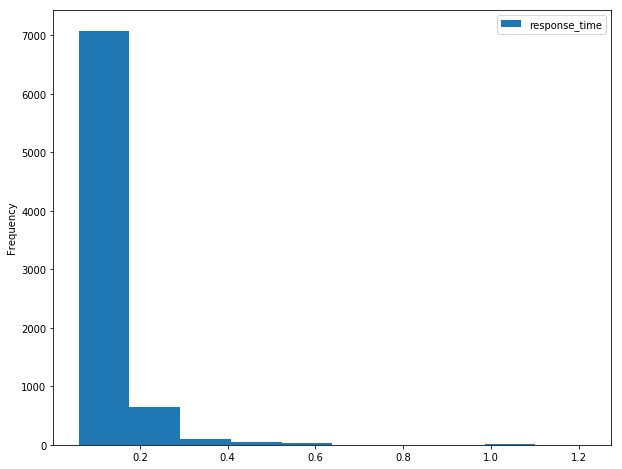

In [91]:
df.plot(kind='hist',figsize=(10,8))

#  plotting in seaborn 

In [93]:
import seaborn as sns
sns.set(color_codes=True)

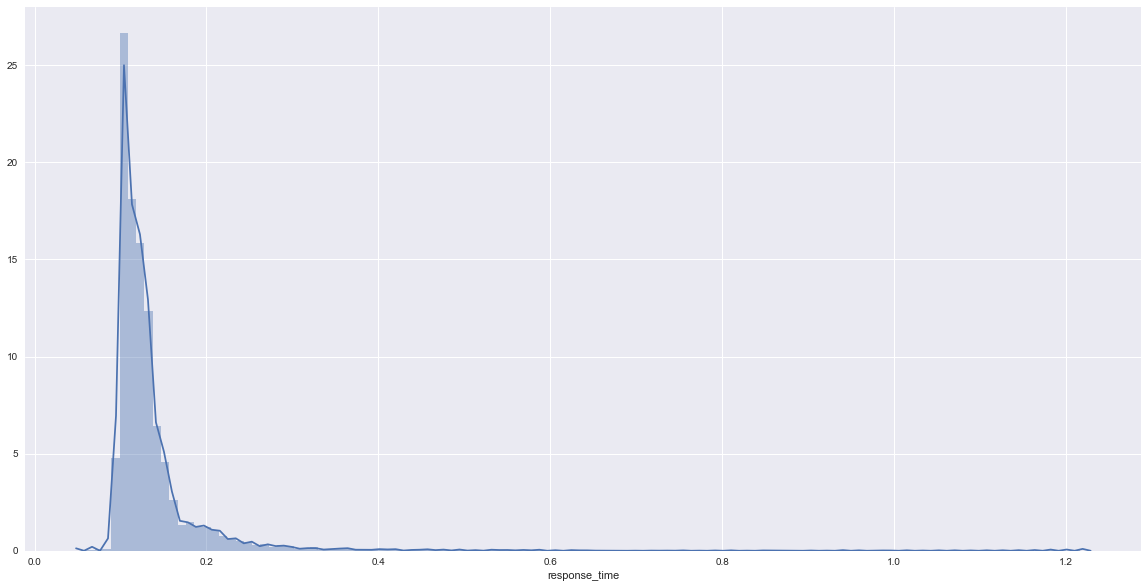

In [104]:
plt.figure(figsize=(20,10))
sns.distplot(df.response_time,bins=120)